In [107]:
import numpy as np
from pprint import pprint
from collections import defaultdict
import matplotlib.pyplot as plt


In [108]:
with open('words', 'r') as F:
    words = F.readlines()

words = list(map(lambda x: x.strip(), words))
num_words = len(words)
print(f'Number of words: {num_words}')

Number of words: 2310


In [109]:
letter_dist = {}
first_letter_dist = {}
num_letters = 0
for word in words:
    letter_count = first_letter_dist.get(word[0])
    if letter_count is None:
        first_letter_dist[word[0]] = [0, 0]
    first_letter_dist[word[0]][0] += 1
    first_letter_dist[word[0]][1] = first_letter_dist[word[0]][0] / num_words
    for letter in word:
        num_letters += 1
        letter_count = letter_dist.get(letter)
        if letter_count is None:
            letter_dist[letter] = [0, 0, 0]
        letter_dist[letter][0] += 1
        letter_dist[letter][1] = letter_dist[letter][0] / num_letters
for letter in letter_dist:
    letter_dist[letter][2] = 1 - (1 - letter_dist[letter][1]) ** 5
    
letter_dist = dict(sorted(letter_dist.items(), key=lambda x: x[1][2], reverse=True))
first_letter_dist = dict(sorted(first_letter_dist.items(), key=lambda x: x[1], reverse=True))


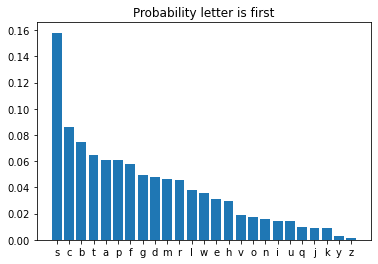

In [112]:

x = list(first_letter_dist.keys())
y = [l[1] for l in first_letter_dist.values()]

plt.bar(x, y)
plt.title('Probability letter is first')
plt.show()

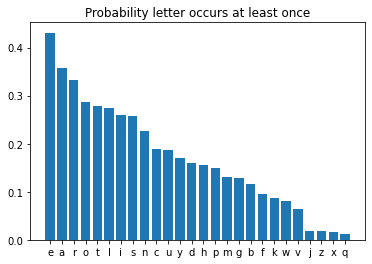

In [111]:
x = list(letter_dist.keys())
y = [l[2] for l in letter_dist.values()]

plt.bar(x, y)
plt.title('Probability letter occurs at least once')
plt.show()